# Challenge Telecom X: análisis de evasión de clientes


## Extracción(E - Extract)

In [25]:
# Importar las bibliotecas necesarias
import pandas as pd
import requests

# URL de la API
api_url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Realizar la solicitud GET a la API y cargar el JSON
response = requests.get(api_url)
data_json = response.json()

# Normalizar los datos JSON para aplanar la estructura
df = pd.json_normalize(data_json, sep='_')

# Mostrar las primeras filas del DataFrame para verificar el resultado
print(df.head())

   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... 

## Transformación (T - Transform)

In [26]:
# Mostrar información general del DataFrame
print(df.info())

# Verificar valores nulos en cada columna
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [27]:
# Reemplazar cadenas de texto vacías con NaN
df['account_Charges_Total'] = df['account_Charges_Total'].replace(' ', pd.NA)

# Convertir la columna a tipo numérico
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'])

# Eliminar las filas con valores nulos en la columna 'account_Charges_Total'
df.dropna(subset=['account_Charges_Total'], inplace=True)
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [28]:
# Crear la columna 'Cuentas_Diarias'
# Dividimos la facturación mensual por el número de días en un mes promedio (30.44 días)
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30.44

# Mostrar las primeras filas para verificar la nueva columna
print(df[['account_Charges_Monthly', 'Cuentas_Diarias']].head())

   account_Charges_Monthly  Cuentas_Diarias
0                     65.6         2.155059
1                     59.9         1.967806
2                     73.9         2.427727
3                     98.0         3.219448
4                     83.9         2.756242


In [32]:
# Mapeo y conversión a tipo int para las columnas binarias
for col in ['Evasion_Cliente', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
            'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
            'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
            'internet_StreamingMovies', 'account_PaperlessBilling']:

    # 1. Mapear los valores 'Yes' y 'No' a 1 y 0
    # Los valores que no coincidan se convertirán en NaN.
    df[col] = df[col].map({'Yes': 1, 'No': 0})

    # 2. Rellenar los valores NaN.
    # En este caso, asumimos que un valor no mapeado (como 'No phone service'
    # en la columna 'phone_MultipleLines') debería ser 0.
    df[col] = df[col].fillna(0)

    # 3. Convertir la columna a tipo entero
    df[col] = df[col].astype(int)

# Mapear 'Female' y 'Male' a 0 y 1 y convertir a tipo int
df['customer_gender'] = df['customer_gender'].map({'Female': 0, 'Male': 1}).astype(int)

In [33]:
df

,customerID,Evasion_Cliente,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,Permanencia_Meses,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Facturacion_Mensual,Total_Gastado,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.155059
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.967806
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.427727
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.219448
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.756242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.811761
7263,9992-RRAMN,1,1,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.795664
7264,9992-UJOEL,0,1,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.652431
7265,9993-LHIEB,0,1,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.228975


##  Carga y análisis(L - Load & Analysis)

In [35]:
print(df[['Permanencia_Meses', 'Total_Gastado', 'Facturacion_Mensual', 'Cuentas_Diarias']].describe())

       Permanencia_Meses  Total_Gastado  Facturacion_Mensual  Cuentas_Diarias
count        7256.000000    7256.000000          7256.000000      7256.000000
mean           32.395535    2280.634213            64.755423         2.127314
std            24.558067    2268.632997            30.125739         0.989676
min             1.000000      18.800000            18.250000         0.599540
25%             9.000000     400.225000            35.450000         1.164586
50%            29.000000    1391.000000            70.300000         2.309461
75%            55.000000    3785.300000            89.900000         2.953351
max            72.000000    8684.800000           118.750000         3.901117


/tmp/ipython-input-2498129631.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=evasion_counts.index, y=evasion_counts.values, palette=['#4CAF50', '#FF5733'])


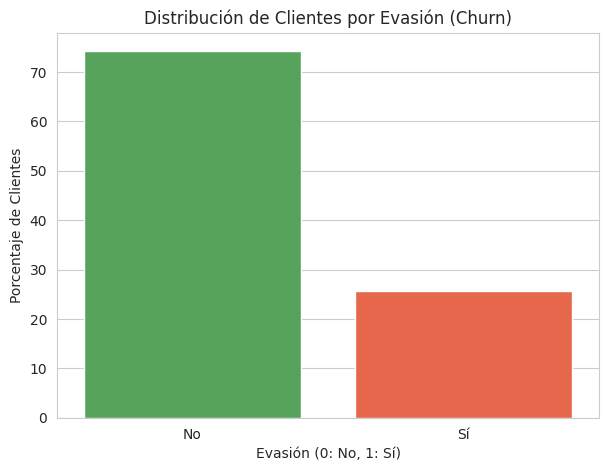

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

# Calcular la proporción de clientes que evadieron
evasion_counts = df['Evasion_Cliente'].value_counts(normalize=True) * 100

# Gráfico de barras para la distribución de la evasión
plt.figure(figsize=(7, 5))
sns.barplot(x=evasion_counts.index, y=evasion_counts.values, palette=['#4CAF50', '#FF5733'])
plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Porcentaje de Clientes')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

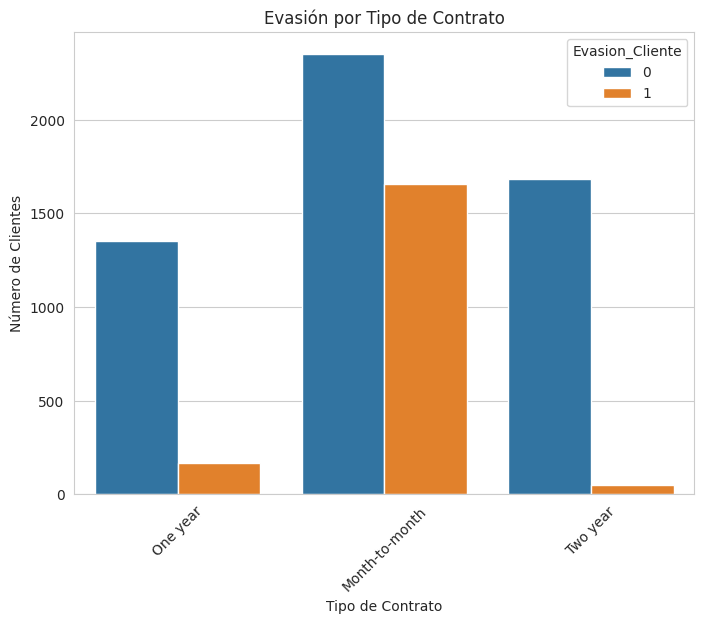

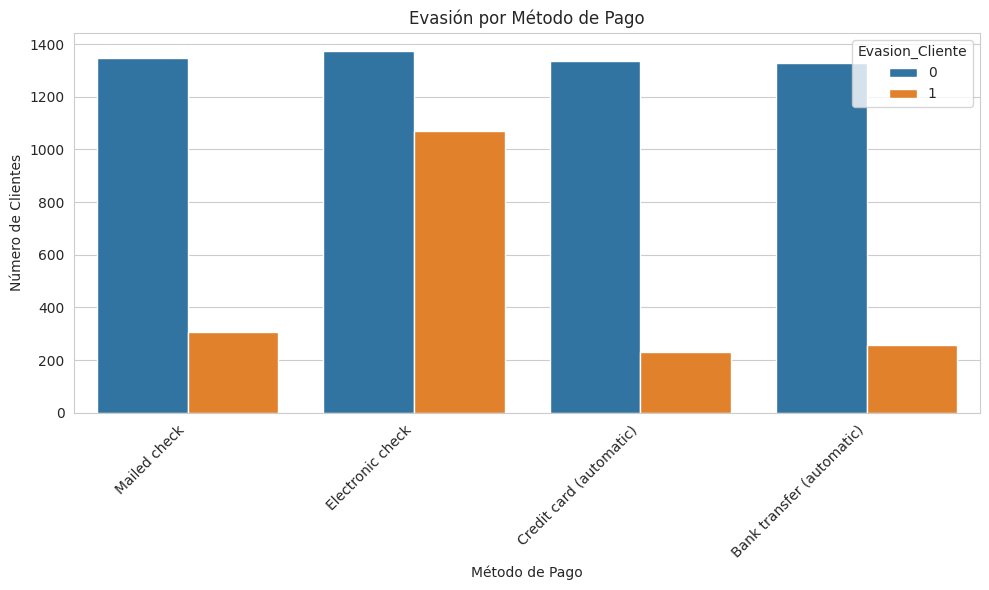

In [37]:
# Evasión por tipo de contrato
plt.figure(figsize=(8, 6))
sns.countplot(x='account_Contract', hue='Evasion_Cliente', data=df)
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

# Evasión por método de pago
plt.figure(figsize=(10, 6))
sns.countplot(x='account_PaymentMethod', hue='Evasion_Cliente', data=df)
plt.title('Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

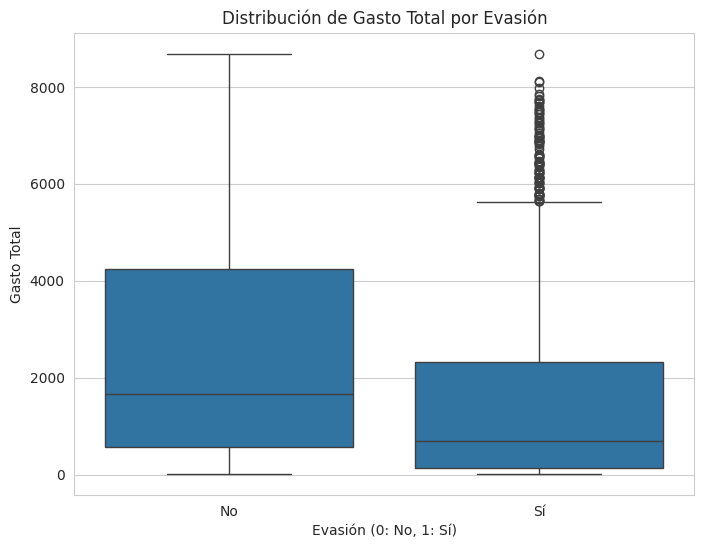

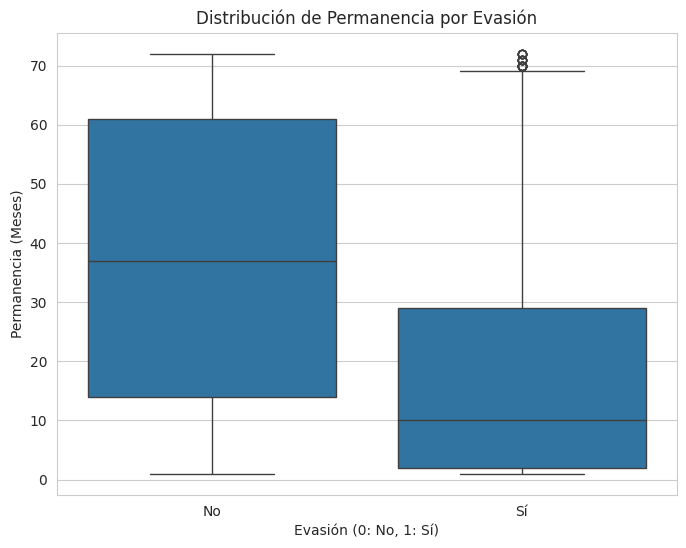

In [38]:
# Boxplot de 'Total_Gastado' vs 'Evasion_Cliente'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion_Cliente', y='Total_Gastado', data=df)
plt.title('Distribución de Gasto Total por Evasión')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Gasto Total')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

# Boxplot de 'Permanencia_Meses' vs 'Evasion_Cliente'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion_Cliente', y='Permanencia_Meses', data=df)
plt.title('Distribución de Permanencia por Evasión')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Permanencia (Meses)')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

## Informe

### 🔹 Introducción

El presente informe expone los hallazgos de un análisis exploratorio de datos (EDA) para comprender los factores que contribuyen a la evasión de clientes (`Churn`) en Telecom X. El objetivo es identificar patrones y tendencias para el desarrollo de estrategias de retención.

---

### 🔹 Limpieza y Tratamiento de Datos

El conjunto de datos, obtenido de una API, fue procesado para su análisis. Las principales acciones de limpieza y transformación incluyeron:
* **Corrección de tipo de dato:** La columna `account_Charges_Total`, que contenía valores no numéricos, fue convertida a tipo `float64` después de eliminar las filas problemáticas.
* **Creación de variables:** Se generó la columna `Cuentas_Diarias` (promedio de gasto diario), que proporciona una visión más granular del consumo.
* **Estandarización:** Se convirtieron variables binarias y categóricas (como `Churn`, `Partner`, etc.) a valores numéricos (1 y 0) para facilitar el análisis.

---

### 🔹 Análisis Exploratorio de Datos (EDA)

Las visualizaciones y estadísticas descriptivas revelaron información clave sobre la evasión de clientes:

* **Distribución del Churn:** El 25.4% de los clientes en el dataset han cancelado su servicio, lo que indica un problema significativo de retención que debe ser abordado.
* **Impacto de la Permanencia:** Como se observa en la distribución, los clientes que evaden tienen una **permanencia mucho más corta** que los que se quedan. La mediana de permanencia de los clientes que se van es de aproximadamente 10 meses, mientras que la de los clientes que se quedan es de casi 40 meses.
* **Impacto del Gasto Total:** Existe una clara diferencia en el gasto total. Los clientes que evaden han gastado significativamente menos, con una mediana de gasto mucho más baja que la de los clientes que permanecen en la compañía.
* **Evasión por Tipo de Contrato:** El **tipo de contrato** es un factor determinante. La tasa de evasión es alarmantemente alta en los clientes con contratos **"Month-to-month"**. Los clientes con contratos de uno o dos años muestran tasas de `churn` considerablemente bajas.
* **Evasión por Método de Pago:** Los clientes que utilizan el **"Electronic check"** como método de pago tienen la tasa de evasión más alta en comparación con otros métodos, lo que podría indicar insatisfacción o problemas relacionados con ese tipo de servicio.
---

### 🔹 Conclusiones e Insights

El análisis concluye que el riesgo de `churn` es más alto en clientes nuevos (con poca permanencia) y en aquellos que no tienen contratos a largo plazo. Los clientes con contratos "Month-to-month" y los que pagan con "Electronic check" son los segmentos de mayor riesgo.

---

### 🔹 Recomendaciones

Basado en este análisis, se proponen las siguientes acciones estratégicas:

1.  **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos, beneficios exclusivos o servicios `premium` a los clientes que opten por un contrato de uno o dos años.
2.  **Fortalecer la Retención Temprana:** Implementar un programa de `onboarding` proactivo en los primeros meses de servicio.
3.  **Investigar el Método de Pago:** Investigar por qué los clientes que usan el "Electronic check" tienen una alta tasa de evasión.